<h1>Nama Kelompok  <br>
1. Dafa Arrsyd : https://github.com/omarraisss<br>
2. Dian Pertiwi : https://github.com/dianpertiwi30/Tutorial-Github-.git <br>
3. Omar Rais : https://github.com/Dafarrsyd/tutorial-gihthub

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
!wget -O kc_house_data.csv https://raw.githubusercontent.com/hermawanwiwid/DTSDataMLProject/master/kc_house_data.csv

--2021-04-27 02:38:39--  https://raw.githubusercontent.com/hermawanwiwid/DTSDataMLProject/master/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2336415 (2.2M) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>]   2.23M  --.-KB/s    in 0.1s    

2021-04-27 02:38:39 (18.1 MB/s) - ‘kc_house_data.csv’ saved [2336415/2336415]



# Pandas

In [ ]:
df = pd.read_csv("kc_house_data.csv")
# df = pd.read_csv("https://raw.githubusercontent.com/hermawanwiwid/DTSDataMLProject/master/kc_house_data.csv")

# take a look at the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3.0,1.00,1180.0,5650,1.0,0,0,3,7,1180.0,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3.0,2.25,2570.0,7242,2.0,0,0,3,7,2170.0,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2.0,1.00,770.0,10000,1.0,0,0,3,6,770.0,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4.0,3.00,1960.0,5000,1.0,0,0,5,7,1050.0,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3.0,2.00,1680.0,8080,1.0,0,0,3,8,1680.0,0.0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df.isnull().any()

id               False
date             False
price            False
bedrooms          True
bathrooms        False
sqft_living       True
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above        True
sqft_basement     True
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [ ]:
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [ ]:
df2 = df[["bedrooms", "sqft_living", "grade", "price"]]
df2

,bedrooms,sqft_living,grade,price
0,3.0,1180.0,7,221900
1,3.0,2570.0,7,538000
2,2.0,770.0,6,180000
3,4.0,1960.0,7,604000
4,3.0,1680.0,8,510000
...,...,...,...,...
21608,3.0,1530.0,8,360000
21609,4.0,2310.0,8,400000
21610,2.0,1020.0,7,402101
21611,3.0,1600.0,8,400000


In [ ]:
df2.describe()

,bedrooms,sqft_living,grade,price
count,21610.000000,21610.000000,21613.000000,2.161300e+04
mean,3.370801,2079.965433,7.656873,5.400881e+05
std,0.930103,918.486103,1.175459,3.671272e+05
min,0.000000,290.000000,1.000000,7.500000e+04
25%,3.000000,1427.750000,7.000000,3.219500e+05
50%,3.000000,1910.000000,7.000000,4.500000e+05
75%,4.000000,2550.000000,8.000000,6.450000e+05
max,33.000000,13540.000000,13.000000,7.700000e+06


# Matplotlib

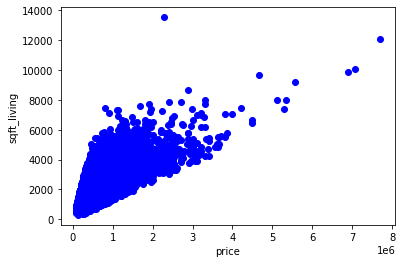

In [ ]:
plt.scatter(df2.price, df2.sqft_living, color="blue")
plt.xlabel("price")
plt.ylabel("sqft_living")
plt.show()

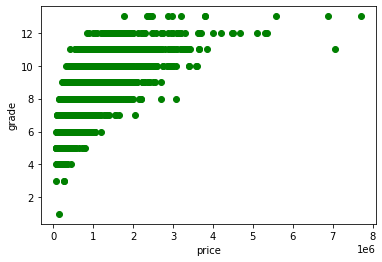

In [ ]:
plt.scatter(df2.price, df2.grade, color="green")
plt.xlabel("price")
plt.ylabel("grade")
plt.show()

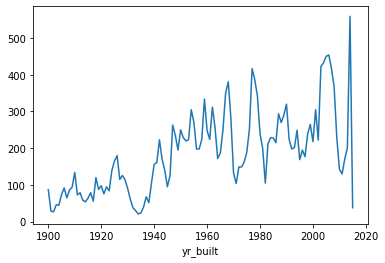

In [ ]:
df.groupby('yr_built').count()["price"].plot()

[]

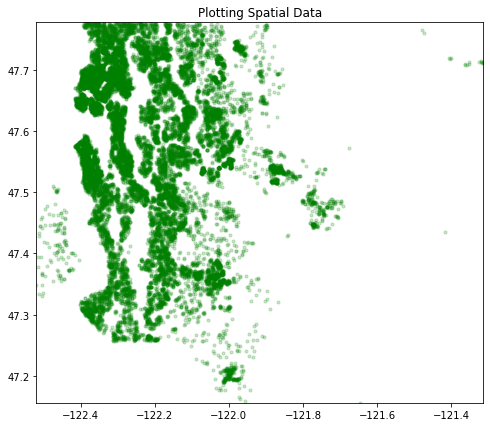

In [ ]:
BBox = ((df.long.min(),   df.long.max(),      
         df.lat.min(), df.lat.max()))

fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df.long, df.lat, zorder=1, alpha= 0.2, c='green', s=10)
ax.set_title('Plotting Spatial Data')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.plot()
# ax.imshow( zorder=0, extent = BBox, aspect= 'equal')

# Plotly

The accepted values for layout.mapbox.style are one of:

- "white-bg" yields an empty white canvas which results in no external HTTP requests
- "open-street-map", "carto-positron", "carto-darkmatter", "stamen-terrain", "stamen-toner" or "stamen-watercolor" yield maps composed of raster tiles from various public tile servers which do not require signups or access tokens
- "basic", "streets", "outdoors", "light", "dark", "satellite", or "satellite-streets" yield maps composed of vector tiles from the Mapbox service, and do require a Mapbox Access Token or an on-premise Mapbox installation.
- A Mapbox service style URL, which requires a Mapbox Access Token or an on-premise Mapbox installation.
- A Mapbox Style object as defined at https://docs.mapbox.com/mapbox-gl-js/style-spec/


Learn more about plotly at https://plotly.com/python/basic-charts/

In [ ]:
import plotly.express as px
# px.set_mapbox_access_token(open("mapbox_token.txt").read())

fig = px.scatter_mapbox(df, lat="lat", lon="long", color="price", size="price",
                        color_continuous_scale=px.colors.sequential.Emrld, 
                        zoom=10, mapbox_style="carto-positron")

fig.show()

# Regression

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import math

In [ ]:
mean_bedrooms = math.floor(df2.bedrooms.mean())
mean_sqft_living = math.floor(df2.sqft_living.mean())

print(mean_bedrooms)
print(mean_sqft_living)

3
2079


In [ ]:
pd.options.mode.chained_assignment = None
df2.bedrooms.fillna(mean_bedrooms, inplace=True)
df2.sqft_living.fillna(mean_sqft_living, inplace=True)

In [ ]:
train, test = train_test_split(df2, test_size=0.2)

In [ ]:
regression = linear_model.LinearRegression()
train_x = train[['price']]
train_y = train[['sqft_living']]
regression.fit(train_x, train_y)
# The coefficients
print(regression)
print('Coefficients: ', regression.coef_)
print('Intercept: ',regression.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Coefficients:  [[0.00174894]]
Intercept:  [1133.48288117]


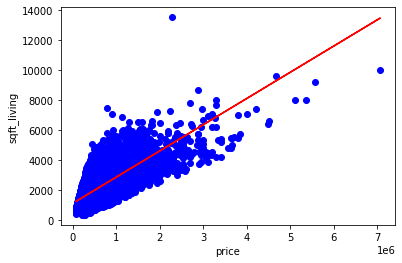

In [ ]:
plt.scatter(train_x, train_y, color="blue")
plt.xlabel("price")
plt.ylabel("sqft_living")
plt.plot(train_x, regression.predict(train_x), color ='r')

In [ ]:
mv_regression = linear_model.LinearRegression()
train_x = train[['bedrooms','grade','sqft_living']]
train_y = train['price']
mv_regression.fit(train_x, train_y)
# The coefficients
print(mv_regression)
print('Coefficients: ', mv_regression.coef_)
print('Intercept: ',mv_regression.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Coefficients:  [-38835.59836086  94658.41170329    210.30922427]
Intercept:  -491087.54882980464


In [ ]:
mv_regression.predict([[3,100,5]])

array([8859298.37253816])

## Eval

In [ ]:
from sklearn.metrics import r2_score

# test_x = np.asanyarray(test[['TV']])
# test_y = np.asanyarray(test[['sales']])
test_x = np.asanyarray(test[['price']])
test_y = np.asanyarray(test[['sqft_living']])
test_y_ = regression.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
# print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 520.04
Residual sum of squares (MSE): 456268.98


## Manual

In [ ]:
X = df2.price
Y = df2.sqft_living
X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
m = num / den
c = Y_mean - m*X_mean

print (m, c)

0.001756261941086172 1131.4290504463331


In [ ]:
sumx = np.sum(X)
sumy = np.sum(Y)
sumx2 = np.sum(X**2)
sumxy = X @ Y
m = len(X)
a = np.array([[m, sumx], [sumx,sumx2]])
b = np.array([sumy,sumxy])
xBar = np.linalg.inv(a) @ b.T

print(xBar)
print(np.linalg.inv(a))
# print(xBar[1]*X+xBar[0])
# print(X)

[1.13142905e+03 1.75626194e-03]
[[ 1.46406979e-04 -1.85411457e-10]
 [-1.85411457e-10  3.43298515e-16]]


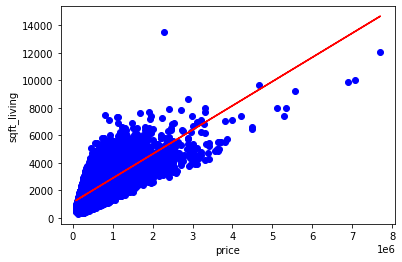

In [ ]:
plt.scatter(X, Y,  color='blue')
plt.plot(X,xBar[1]*X+xBar[0], color ='r')
plt.xlabel("price")
plt.ylabel("sqft_living")
plt.show()